# Data collection

In this notebook we gather all our findings for some statistics. We run the model using Mesa's `batch_run` method multiple times. In this notebook we gather all our findings for some statistics. 

In [11]:
from simulation.model import TrafficModel

import numpy
import pandas
from pandas import NamedAgg, Series
from mesa.batchrunner import batch_run
from pathlib import Path
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import Range1d
import matplotlib.pyplot as plt

# Create plots folder
Path("plots").mkdir(exist_ok=True)

## Simulation

First, we run the simulation. We set all parameters and then start the simulation multiple times using Mesa's `batch_run` method. This also uses multitasking. So to speed up you can set the number of processes (`number_processes`) to match your computer's number of logical cores.

For the different plots we used various values for these parameters. When there is an array, each possible combination of values is run multiple times. The number of iterations is dependent of the parameter `iterations`. If this process does not terminate or takes to long, try to reduce the number of iterations.

In `results_1` is the data, that we used for the average velocity and average flow plots, while in `results_2` you can find the results for the flow-density plots. For generating the plots in the report we've used more iterations than you can find in the given results files.

In [12]:
lane_configs = {
    0: "Shared Road",
    1: "Bike Lane",
    2: "Bike Lane and ASL",
}
iterations = 10
min_step = 200
max_step = 500

In [13]:
def run_experiment_1():
    results = batch_run(
        TrafficModel,
        parameters={
            "bike_lane_config": [0, 1, 2],
            "p_new_agents": 0.5,
            "p_slow_down": 0.2,
            "traffic_light_phase_length": numpy.arange(20, 60, 5),
            "car_bike_ratio": 0.5,
        },
        number_processes=12,
        iterations=iterations,
        data_collection_period=1,  # -1 = last round only
        max_steps=max_step,  # 500
        display_progress=True,
    )
    results = [r for r in results if r["Step"] >= min_step]
    return pandas.DataFrame(map(pandas.Series, results))

def run_experiment_2():
    results = batch_run(
        TrafficModel,
        parameters={
            "bike_lane_config": [0, 1, 2],
            "p_new_agents": numpy.linspace(0.05, 1.0, 20),
            "p_slow_down": 0.2,
            "traffic_light_phase_length": 30,
            "car_bike_ratio": 0.5,
        },
        number_processes=12,
        iterations=iterations,
        data_collection_period=1,  # -1 = last round only
        max_steps=300,
        display_progress=True,
    )
    results = [r for r in results if r["Step"] > 100]
    return pandas.DataFrame(map(pandas.Series, results))


results_file_1 = Path("results_1.csv")
if not results_file_1.exists():
    results_1 = run_experiment_1()
    results_1.to_csv(results_file_1)
else:
    results_1 = pandas.read_csv(results_file_1)

results_file_2 = Path("results_2.csv")
if not results_file_2.exists():
    results_2 = run_experiment_2()
    results_2.to_csv(results_file_2)
else:
    results_2 = pandas.read_csv(results_file_2)

## Results

Here is an overview of all gathered results:

In [14]:
results_1

,Unnamed: 0,RunId,iteration,Step,bike_lane_config,p_new_agents,p_slow_down,traffic_light_phase_length,car_bike_ratio,Vehicles,Cars,Bikes,Car average velocity,Bike average velocity,Cell density,Average flow
0,0,0.0,0.0,201.0,0.0,0.5,0.2,20.0,0.5,1162.0,426.0,736.0,1.755869,1.751359,0.144550,0.253397
1,1,0.0,0.0,202.0,0.0,0.5,0.2,20.0,0.5,1167.0,428.0,739.0,1.757009,1.753721,0.145201,0.254818
2,2,0.0,0.0,203.0,0.0,0.5,0.2,20.0,0.5,1168.0,426.0,742.0,1.718310,1.715633,0.144905,0.248746
3,3,0.0,0.0,204.0,0.0,0.5,0.2,20.0,0.5,1172.0,427.0,745.0,1.765808,1.757047,0.145320,0.255798
4,4,0.0,0.0,205.0,0.0,0.5,0.2,20.0,0.5,1174.0,429.0,745.0,1.820513,1.773154,0.145794,0.261038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71995,71995,239.0,9.0,496.0,2.0,0.5,0.2,55.0,0.5,2848.0,1263.0,1585.0,0.771971,0.906625,0.262747,0.222523
71996,71996,239.0,9.0,497.0,2.0,0.5,0.2,55.0,0.5,2849.0,1261.0,1588.0,0.702617,0.886650,0.262549,0.211403
71997,71997,239.0,9.0,498.0,2.0,0.5,0.2,55.0,0.5,2856.0,1262.0,1594.0,0.675911,0.885822,0.262945,0.208533
71998,71998,239.0,9.0,499.0,2.0,0.5,0.2,55.0,0.5,2852.0,1261.0,1591.0,0.675654,0.887492,0.262668,0.208514


In [15]:
results_2

,Unnamed: 0,RunId,iteration,Step,bike_lane_config,p_new_agents,p_slow_down,traffic_light_phase_length,car_bike_ratio,Vehicles,Cars,Bikes,Car average velocity,Bike average velocity,Cell density,Average flow
0,0,0.0,0.0,101.0,0.0,0.05,0.2,30.0,0.5,122.0,58.0,64.0,3.931034,2.531250,0.017536,0.056056
1,1,0.0,0.0,102.0,0.0,0.05,0.2,30.0,0.5,124.0,59.0,65.0,3.745763,2.492308,0.017832,0.055077
2,2,0.0,0.0,103.0,0.0,0.05,0.2,30.0,0.5,125.0,60.0,65.0,3.516667,2.492308,0.018069,0.053917
3,3,0.0,0.0,104.0,0.0,0.05,0.2,30.0,0.5,127.0,61.0,66.0,2.868852,2.590909,0.018365,0.050034
4,4,0.0,0.0,105.0,0.0,0.05,0.2,30.0,0.5,127.0,61.0,66.0,2.819672,2.575758,0.018365,0.049455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599995,599995,2999.0,49.0,296.0,2.0,1.00,0.2,30.0,0.5,3168.0,1404.0,1764.0,1.136040,1.121882,0.292162,0.329604
599996,599996,2999.0,49.0,297.0,2.0,1.00,0.2,30.0,0.5,3176.0,1406.0,1770.0,1.110242,1.110169,0.292716,0.324973
599997,599997,2999.0,49.0,298.0,2.0,1.00,0.2,30.0,0.5,3182.0,1408.0,1774.0,1.061080,1.100902,0.293191,0.317608
599998,599998,2999.0,49.0,299.0,2.0,1.00,0.2,30.0,0.5,3182.0,1406.0,1776.0,1.023471,1.061937,0.292953,0.306119


## Speed and flow analysis

### Average speed and average system flow analysis

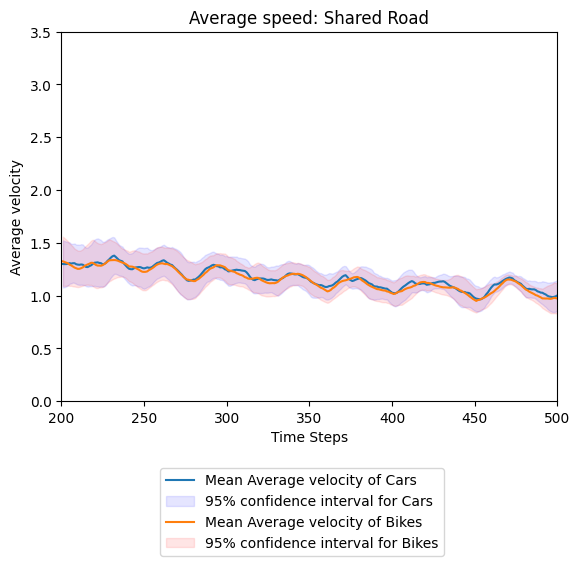

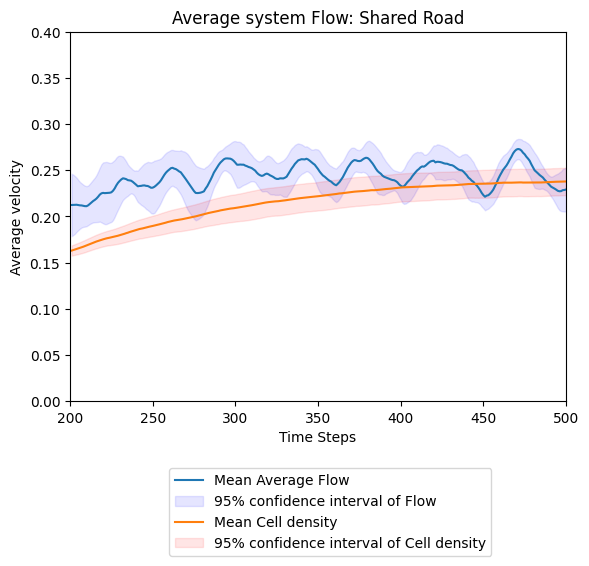

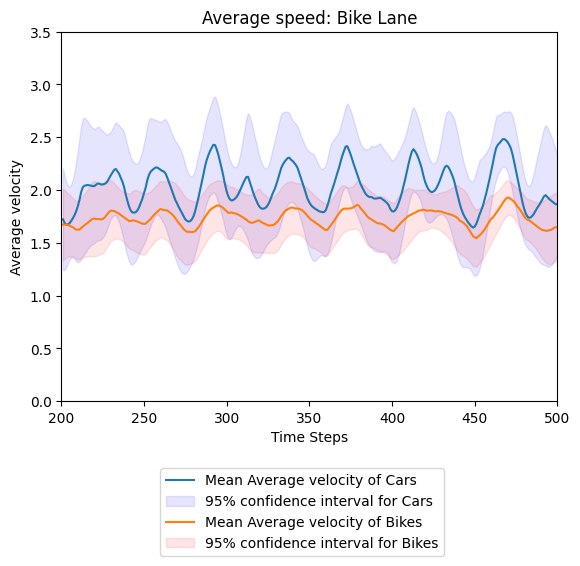

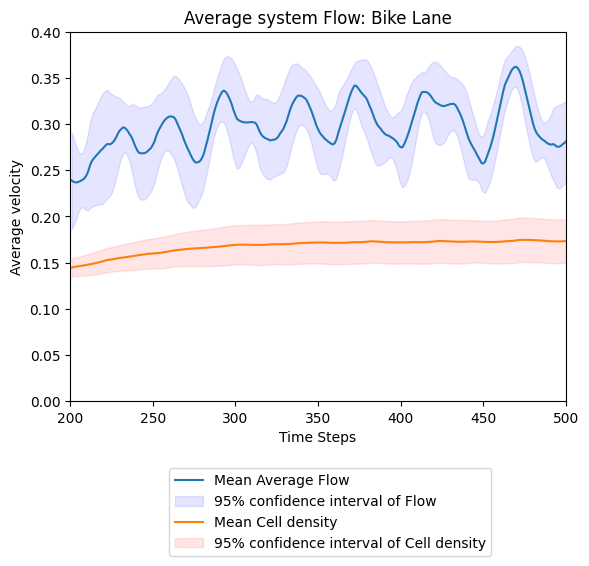

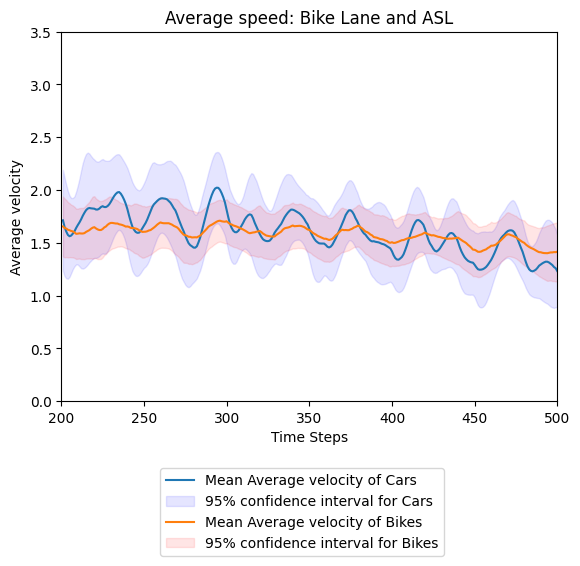

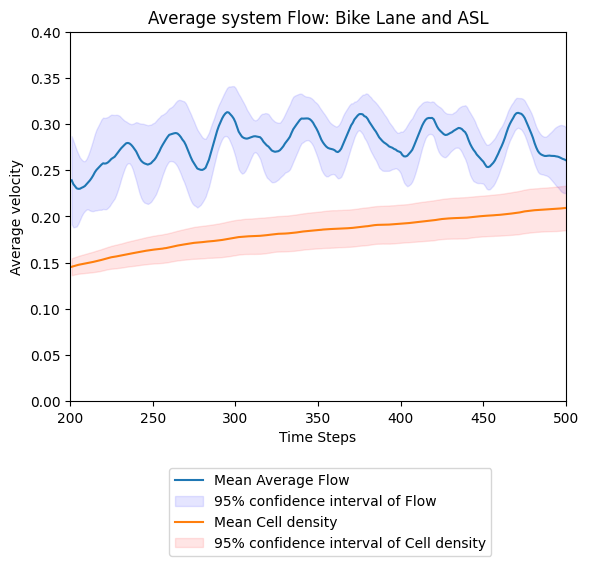

In [16]:
# 1) filter for bike_lane configurations
# 2) aggregate for mean and std for bikes and cars
# 3) do the plotting

for config, lane_type in lane_configs.items():
    # do the filtering and aggregations for mean and stdv
    data = results_1.loc[
        results_1["bike_lane_config"] == config,
        ["Step", "Car average velocity", "Bike average velocity", "Cell density", "Average flow"],
    ]

    data = (
        data.groupby(by="Step")
        .agg(
            mean_Car_velo=NamedAgg(column="Car average velocity", aggfunc=Series.mean),
            mean_Bike_velo=NamedAgg(column="Bike average velocity", aggfunc=Series.mean),
            std_Car_velo=NamedAgg(column="Car average velocity", aggfunc=Series.std),
            std_Bike_velo=NamedAgg(column="Bike average velocity", aggfunc=Series.std),
            mean_Average_flow=NamedAgg(column="Average flow", aggfunc=Series.mean),
            std_Average_flow=NamedAgg(column="Average flow", aggfunc=Series.std),
            mean_cell_density=NamedAgg(column="Cell density", aggfunc=Series.mean),
            std_cell_density=NamedAgg(column="Cell density", aggfunc=Series.std),
        )
        .reset_index()
    )

    fig1, ax1 = plt.subplots()

    # first plot confidence intervals for Cars and their speed
    vehicle = "Car"
    std_data = f"std_{vehicle}_velo"
    # assumes Normal dist and 95% conf int with #iterations data points
    ci_car = 1.96 * data[std_data] / numpy.sqrt(iterations)
    ax1.plot(
        data["Step"], data[f"mean_{vehicle}_velo"], label=f"Mean Average velocity of {vehicle}s"
    )
    ax1.fill_between(
        data["Step"],
        (data[f"mean_{vehicle}_velo"] - ci_car),
        (data[f"mean_{vehicle}_velo"] + ci_car),
        color="b",
        alpha=0.1,
        label=f"95% confidence interval for {vehicle}s",
    )

    # then add plots for confidence intervals for Bikes and their speed
    vehicle = "Bike"
    std_data = f"std_{vehicle}_velo"
    # assumes Normal dist and 95% conf int with #iterations data points
    ci_car = 1.96 * data[std_data] / numpy.sqrt(iterations)
    ax1.plot(
        data["Step"], data[f"mean_{vehicle}_velo"], label=f"Mean Average velocity of {vehicle}s"
    )
    ax1.fill_between(
        data["Step"],
        (data[f"mean_{vehicle}_velo"] - ci_car),
        (data[f"mean_{vehicle}_velo"] + ci_car),
        color="r",
        alpha=0.1,
        label=f"95% confidence interval for {vehicle}s",
    )

    # plot configurations
    plt.xlabel("Time Steps")
    plt.xlim(min_step, max_step)
    plt.ylabel("Average velocity")
    plt.ylim(0, 3.5)
    plt.title(f"Average speed: {lane_type}")
    lgd = plt.legend(bbox_to_anchor=(0.2, -0.3), loc="center left", borderaxespad=0)
    plt.savefig(f"plots/mean_speed_{lane_type}.png", bbox_extra_artists=(lgd,), bbox_inches="tight")

    # do all for Flow as well
    fig2, ax2 = plt.subplots()

    # assumes Normal dist and 95% conf int with #iterations data points
    ci_car = 1.96 * data["std_Average_flow"] / numpy.sqrt(iterations)
    ax2.plot(data["Step"], data["mean_Average_flow"], label="Mean Average Flow")
    ax2.fill_between(
        data["Step"],
        (data["mean_Average_flow"] - ci_car),
        (data["mean_Average_flow"] + ci_car),
        color="b",
        alpha=0.1,
        label=f"95% confidence interval of Flow",
    )

    # and for cell density

    # assumes Normal dist and 95% conf int with #iterations data points
    ci_car = 1.96 * data["std_cell_density"] / numpy.sqrt(iterations)
    ax2.plot(data["Step"], data["mean_cell_density"], label="Mean Cell density")
    ax2.fill_between(
        data["Step"],
        (data["mean_cell_density"] - ci_car),
        (data["mean_cell_density"] + ci_car),
        color="r",
        alpha=0.1,
        label=f"95% confidence interval of Cell density",
    )

    # plot configurations
    plt.xlabel("Time Steps")
    plt.xlim(min_step, max_step)
    plt.ylabel("Average velocity")
    plt.ylim(0, 0.4)
    plt.title(f"Average system Flow: {lane_type}")
    lgd = plt.legend(bbox_to_anchor=(0.2, -0.3), loc="center left", borderaxespad=0)
    plt.savefig(f"plots/mean_flow_{lane_type}.png", bbox_extra_artists=(lgd,), bbox_inches="tight")

### Mean average velocity comparison

Shared Road
mean_Car_velo     1.165442
mean_Bike_velo    1.150380
dtype: float64
Bike Lane
mean_Car_velo     2.019112
mean_Bike_velo    1.730497
dtype: float64
Bike Lane and ASL
mean_Car_velo     1.607311
mean_Bike_velo    1.579350
dtype: float64


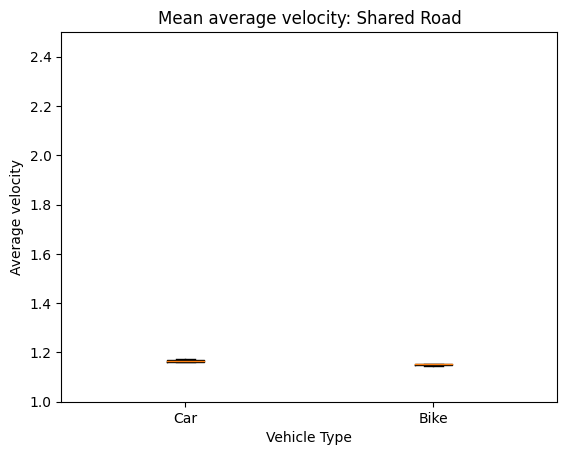

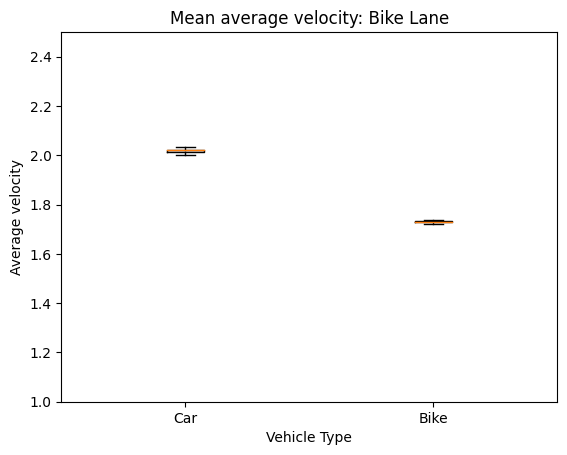

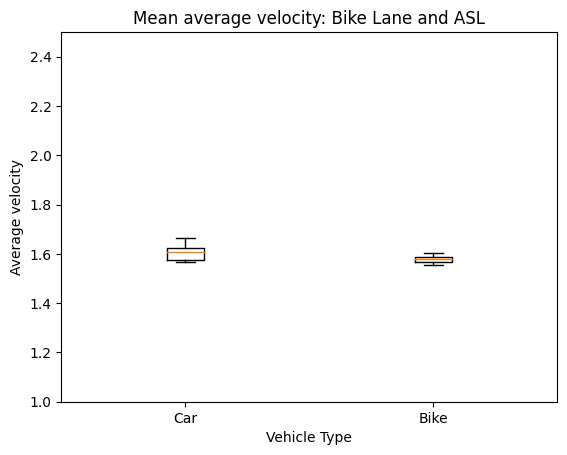

In [17]:
# vehicle='empty'
for config, lane_type in lane_configs.items():
    # do the filtering and aggregations for mean and stdv
    data = results_1.loc[
        results_1["bike_lane_config"] == config,
        [
            "Step",
            "iteration",
            "Car average velocity",
            "Bike average velocity",
            "Cell density",
            "Average flow",
        ],
    ]

    data = (
        data.groupby(by="iteration")
        .agg(
            mean_Car_velo=NamedAgg(column="Car average velocity", aggfunc=Series.mean),
            mean_Bike_velo=NamedAgg(column="Bike average velocity", aggfunc=Series.mean),
            std_Car_velo=NamedAgg(column="Car average velocity", aggfunc=Series.std),
            std_Bike_velo=NamedAgg(column="Bike average velocity", aggfunc=Series.std),
            mean_Average_flow=NamedAgg(column="Average flow", aggfunc=Series.mean),
            std_Average_flow=NamedAgg(column="Average flow", aggfunc=Series.std),
            mean_cell_density=NamedAgg(column="Cell density", aggfunc=Series.mean),
            std_cell_density=NamedAgg(column="Cell density", aggfunc=Series.std),
        )
        .reset_index()
    )

    box_data = data.loc[:, ["mean_Car_velo", "mean_Bike_velo"]]
    print(lane_type)
    print(Series.mean(box_data))

    fig3, ax3 = plt.subplots()
    ax3.boxplot(box_data)
    ax3.set_xticklabels(["Car", "Bike"])

    # plot configurations
    plt.xlabel("Vehicle Type")
    plt.ylabel("Average velocity")
    plt.ylim(1, 2.5)
    plt.title(f"Mean average velocity: {lane_type}")
    plt.savefig(f"plots/boxplot_speed_{lane_type}.png")

## Flow-Densitiy Plots

We generated multiple plots that compare the behavior of flow and density in the various runs.

### Behavior for various fixed p_new_agents

In [18]:
def add_series(plt, data, p, config, color, label):
    data = (
        data[
            (data["p_new_agents"] >= p - 0.001)
            & (
                data["p_new_agents"] <= p + 0.001
            )  # Check for numerical closeness to `p` instead of exact values
            & (data["bike_lane_config"] == config)
        ]
        .groupby(["RunId"])[["Average flow", "Cell density"]]
        .mean()
    )
    plt.scatter(
        data["Cell density"], data["Average flow"], size=10, fill_color=color, legend_label=label
    )


output_notebook()
colors = {0: "red", 1: "blue", 2: "green"}
for p in numpy.linspace(0.25, 1.0, 4):
    plot = figure(
        title=f"Flow per Density (p={p:.2f})", x_axis_label="Density", y_axis_label="Flow"
    )

    for config, lane_type in lane_configs.items():
        add_series(plot, results_2, p, config, colors[config], lane_type)

    plot.legend.location = "top_left"
    plot.title.text_font_size = "16pt"
    plot.legend.label_text_font_size = "16pt"
    plot.xaxis.axis_label_text_font_size = "16pt"
    plot.yaxis.axis_label_text_font_size = "16pt"
    plot.xaxis.major_label_text_font_size = "16pt"
    plot.yaxis.major_label_text_font_size = "16pt"
    plot.x_range = Range1d(0, 0.25)
    plot.y_range = Range1d(0, 0.5)

    show(plot)

Loading BokehJS ...

### Combined flow-density plot

In [19]:
def add_series(plt, data, color, label):
    data = data.groupby(["RunId"])[["Average flow", "Cell density"]].mean()
    plt.scatter(
        data["Cell density"], data["Average flow"], size=5, fill_color=color, legend_label=label
    )


output_notebook()
plot = figure(
    title=f"Flow per Density",
    x_axis_label="Density (number of agents per cell)",
    y_axis_label="Flow (number of agents per cell per time step)",
)

colors = {0: "red", 1: "blue", 2: "green"}
for config, lane_type in lane_configs.items():
    add_series(plot, results_2[(results_2["bike_lane_config"] == config)], colors[config], lane_type)

plot.legend.location = "top_left"
plot.title.text_font_size = "16pt"
plot.legend.label_text_font_size = "16pt"
plot.xaxis.axis_label_text_font_size = "16pt"
plot.yaxis.axis_label_text_font_size = "16pt"
plot.xaxis.major_label_text_font_size = "16pt"
plot.yaxis.major_label_text_font_size = "16pt"
plot.x_range = Range1d(0, 0.25)
plot.y_range = Range1d(0, 0.5)

show(plot)

Loading BokehJS ...

### Max flow values

In [20]:
def getMax(results, conf):
    data = (
        results[(results["bike_lane_config"] == conf)]
        .groupby(["RunId"])[["Average flow", "Cell density", "p_new_agents"]]
        .mean()
    )
    res = data.loc[data["Average flow"].idxmax()]
    return f"{res['Average flow']:.4f} (density: {res['Cell density']:.4f}, p_new_agents: {res['p_new_agents']:.2f})"


for config, lane_type in lane_configs.items():
    print(f"Max average flow for {lane_type}: {getMax(results_2, config)}")

Max average flow for Shared Road: 0.2386 (density: 0.1445, p_new_agents: 0.40)
Max average flow for Bike Lane: 0.3411 (density: 0.2174, p_new_agents: 1.00)
Max average flow for Bike Lane and ASL: 0.3005 (density: 0.2240, p_new_agents: 1.00)
